<a href="https://colab.research.google.com/github/taruj/BikeSharing_Assignment/blob/main/BikeSharing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing - Assignment
### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The Comany has decided to come up with a mindful business plan to be able to increase/ accelerate revenue as soon as the ongoing lockdown ends and the economy shows signs of recovery.

## Business Goal:
### You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



In [1]:
# Load Data from Google Drive
from google.colab import drive
drive.mount('/content/drive/')

# Import Data Wrangling and Visulization Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # Supress Warnings 

# Import Libraries for Linear Regression

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



 # Set float format to 2 decimal points 
pd.options.display.float_format = '{:.4f}'.format

plt.rcParams["figure.figsize"] = (20,20) # Set Default figsize of 15 by 15
plt.rcParams["axes.titlesize"] = 15
pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Data Loading and Gain Basic Insights
+ ### .head() -> Return top n (5 by default) rows of a data frame or series
+ ### .shape -> Return a tuple representing the dimensionality of the DataFrame. (Number of Rows X Columns)
+ ### .info() -> Count of data (cross check with shape) and Data Types
+ ### .describe() -> Returns description of the data in the DataFrame. For numerical data it provides

> 1. count - The number of not-empty values.
> 2. mean - The average (mean) value.
> 3. std - The standard deviation.
> 4. min - the minimum value.
> 5. 25% - The 25% percentile.
> 6. 50% - The 50% percentile.
> 7. 75% - The 75% percentile.
> 8. max - the maximum value

+ ### isnull().sum() -> Additional Check on count (number of) null values per column



In [2]:
bike_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


In [3]:
# Get Data Shape (Rows by Cloumns)
bike_data.shape

(730, 16)

In [4]:
# Count of Missing data and Data Types
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


 <font color='dodgerblue'>No Missing data, Data Type for dteday is object rest all are numerical data

In [5]:
 #<font color='red'>bar</font> 
 # Descriptive stats of the data for Central Tendency, Dispersion
 bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,365.5000,2.4986,0.5000,6.5260,0.0288,2.9973,0.6836,1.3945,20.3193,23.7263,62.7652,12.7636,849.2493,3658.7575,4508.0068
std,210.8771,1.1102,0.5003,3.4502,0.1673,2.0062,0.4654,0.5448,7.5067,8.1503,14.2376,5.1958,686.4799,1559.7587,1936.0116
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,2.4243,3.9535,0.0000,1.5002,2.0000,20.0000,22.0000
25%,183.2500,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,13.8119,16.8897,52.0000,9.0417,316.2500,2502.2500,3169.7500
50%,365.5000,3.0000,0.5000,7.0000,0.0000,3.0000,1.0000,1.0000,20.4658,24.3682,62.6250,12.1253,717.0000,3664.5000,4548.5000
75%,547.7500,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,26.8806,30.4458,72.9896,15.6256,1096.5000,4783.2500,5966.0000
max,730.0000,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,35.3283,42.0448,97.2500,34.0000,3410.0000,6946.0000,8714.0000


In [6]:
# Additional check for Null Data
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 <font color='dodgerblue'>No Null Values</font> 

# Data Cleaning

1. #### instant: record index -> We can drop instant as it will not add any value to the prediction
2. #### dteday : date -> We can drop drop dteday as month and weekday are available
3. ### Total Counts are Available we can drop
> + #### casual: count of casual users
> + #### registered: count of registered users

### .drop() Drop the column, with parameter inplace=True so that the data is removed from the current dataframe


In [7]:
bike_data.drop(['instant'], axis = 1, inplace = True)

In [8]:
bike_data.drop(['dteday'], axis = 1, inplace = True)

In [9]:
bike_data.drop(['casual'], axis = 1, inplace = True)

In [10]:
bike_data.drop(['registered'], axis = 1,inplace = True)

### Identify the remaining data, data types and run
.corr() to Compute pairwise correlation of columns (excluding NA/null values)

In [11]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [12]:
bike_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.0000,-0.0000,0.8310,-0.0109,-0.0031,0.0138,0.0213,0.3334,0.3420,0.2082,-0.2296,0.4046
yr,-0.0000,1.0000,-0.0000,0.0082,-0.0055,-0.0029,-0.0503,0.0488,0.0472,-0.1125,-0.0116,0.5697
mnth,0.8310,-0.0000,1.0000,0.0189,0.0095,-0.0047,0.0456,0.2191,0.2264,0.2249,-0.2080,0.2782
holiday,-0.0109,0.0082,0.0189,1.0000,-0.1020,-0.2529,-0.0344,-0.0288,-0.0327,-0.0157,0.0063,-0.0688
weekday,-0.0031,-0.0055,0.0095,-0.1020,1.0000,0.0358,0.0311,-0.0002,-0.0075,-0.0523,0.0143,0.0675
workingday,0.0138,-0.0029,-0.0047,-0.2529,0.0358,1.0000,0.0602,0.0535,0.0529,0.0232,-0.0187,0.0625
weathersit,0.0213,-0.0503,0.0456,-0.0344,0.0311,0.0602,1.0000,-0.1195,-0.1206,0.5903,0.0398,-0.2959
temp,0.3334,0.0488,0.2191,-0.0288,-0.0002,0.0535,-0.1195,1.0000,0.9917,0.1286,-0.1582,0.6270
atemp,0.3420,0.0472,0.2264,-0.0327,-0.0075,0.0529,-0.1206,0.9917,1.0000,0.1415,-0.1839,0.6307
hum,0.2082,-0.1125,0.2249,-0.0157,-0.0523,0.0232,0.5903,0.1286,0.1415,1.0000,-0.2485,-0.0985


# Identify Outliers
### Import Data Dictionary 
### Find Number of Unique Values
### Find Outliers using Box Plot


### Data Dictionary 
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog	- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- cnt: count of total rental bikes including both casual and registered

In [13]:
bike_data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

### From Data Dictionary and nunique Data we can Conclude **Outliers** can exist in 
- atem
- temp
- hum (humidity)
- winspeed

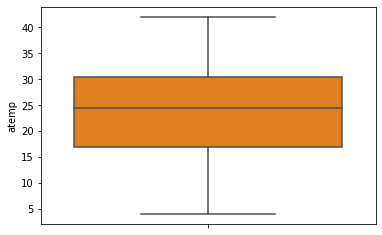

In [14]:
sns.boxplot(y=bike_data.atemp, data=bike_data, orient = "h", palette = "autumn")
plt.show()

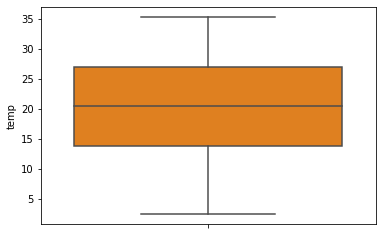

In [15]:
sns.boxplot(y=bike_data.temp, data=bike_data, orient = "h", palette = "autumn")
plt.show()

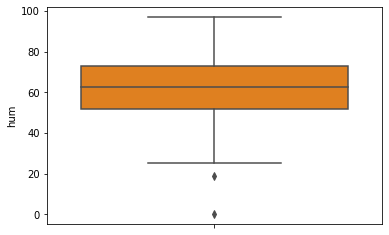

In [16]:
sns.boxplot(y=bike_data.hum, data=bike_data, orient = "h", palette = "autumn")
plt.show()

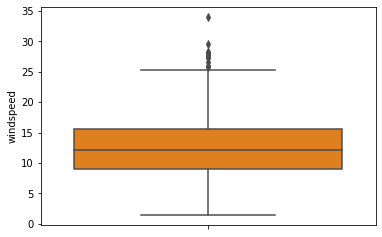

In [17]:
sns.boxplot(y=bike_data.windspeed, data=bike_data, orient = "h", palette = "autumn")
plt.show()

In [18]:
windq = bike_data.windspeed.quantile(np.arange(0.05,1,0.05))
windq

0.0500    5.3261
0.1000    6.7048
0.1500    7.7435
0.2000    8.3885
0.2500    9.0417
0.3000    9.5836
0.3500   10.2502
0.4000   10.9416
0.4500   11.4607
0.5000   12.1253
0.5500   12.6675
0.6000   13.4338
0.6500   14.2162
0.7000   14.9713
0.7500   15.6256
0.8000   16.6398
0.8500   18.1287
0.9000   19.8340
0.9500   23.0000
Name: windspeed, dtype: float64

In [19]:
humq = bike_data.hum.quantile(np.arange(0.05,1,0.05))
humq

0.0500   40.7417
0.1000   45.0000
0.1500   48.1833
0.2000   49.9750
0.2500   52.0000
0.3000   54.1833
0.3500   56.8333
0.4000   58.5130
0.4500   60.4209
0.5000   62.6250
0.5500   64.7458
0.6000   66.8750
0.6500   68.8687
0.7000   70.7500
0.7500   72.9896
0.8000   75.2917
0.8500   77.5687
0.9000   81.7625
0.9500   86.8687
Name: hum, dtype: float64

<font color='dodgerblue'>No abbrent values noted

### Convert Categorical data into names (meaningful names)
### Create pair plots for linear relationships

In [20]:
bike_data.season.replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}, inplace = True)

In [21]:
bike_data.weathersit.replace({1:'Clear',2:'Cloudy',3:'Light Rain and Snow',4:'Heavy Rain or Snow'}, inplace = True)

In [22]:
bike_data.mnth = bike_data.mnth.replace({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sept',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'})

In [23]:
bike_data.weekday = bike_data.weekday.replace({
    0: 'Sun',
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat'})

## Create Pair Plots for finding linear / corelated values

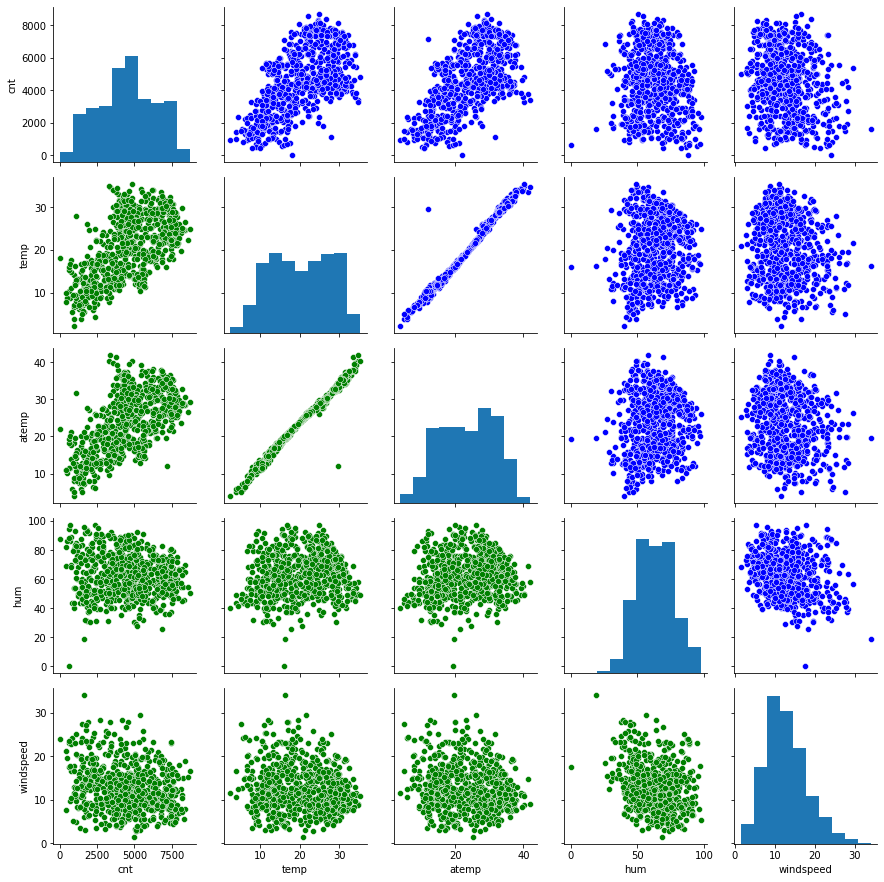

In [24]:
# instead of using the same color using a Pair Grid to isolate the pairs in a visually indipendant way
pg = sns.PairGrid(bike_data,vars = ['cnt', 'temp', 'atemp', 'hum','windspeed'])
pg.map_upper(sns.scatterplot,color = 'blue')
pg.map_lower(sns.scatterplot, color = 'green')
pg.map_diag(plt.hist,)

 <font color='dodgerblue'> From the plot we can see there is a linear relationship between atemp and temp and they are highly corelated

### Create a plain pair plot for the entire data set


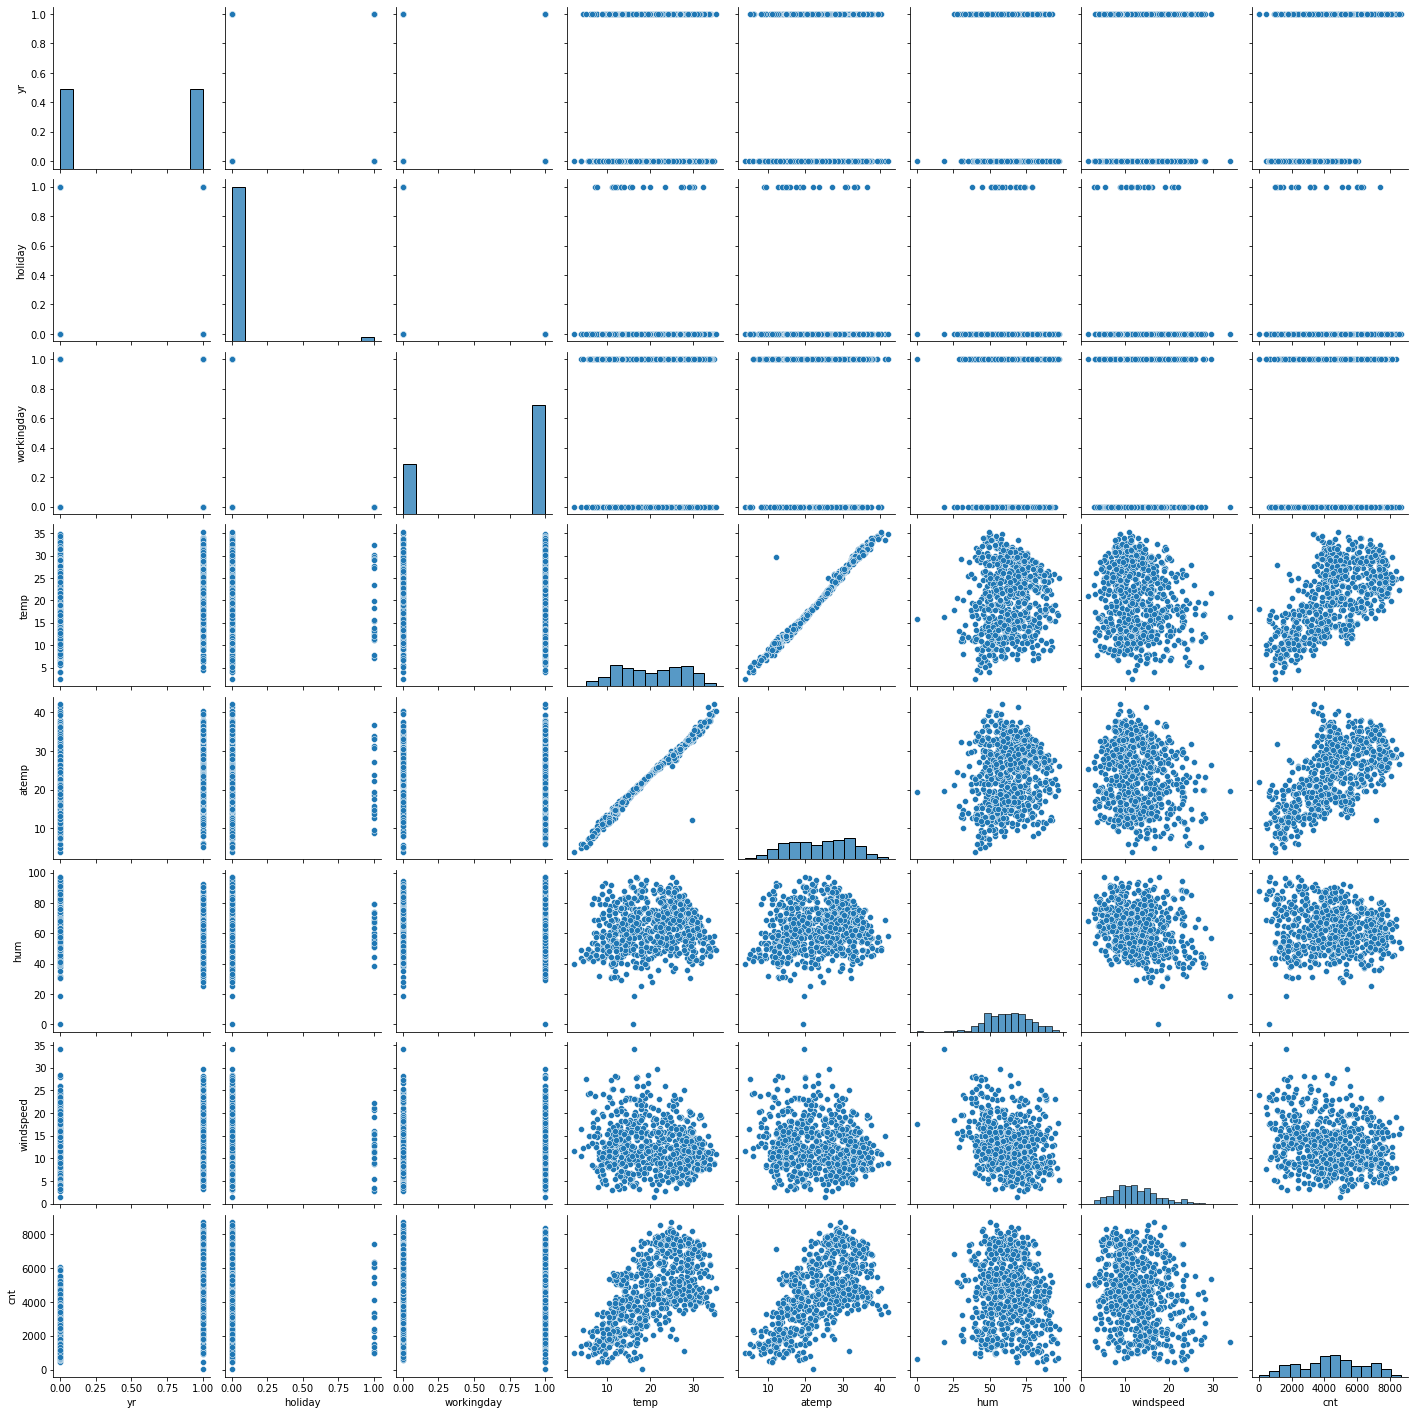

In [25]:
sns.pairplot(bike_data)
plt.show()

Significantly Higher Correlation existe between 'atemp' and 'temp', and it is expectd since they are describing the same data
temp (Temprature) is one of the key factor that influences the cnt (count of rider(es))

### Create a heatmap for data set to check corelaration of other factors

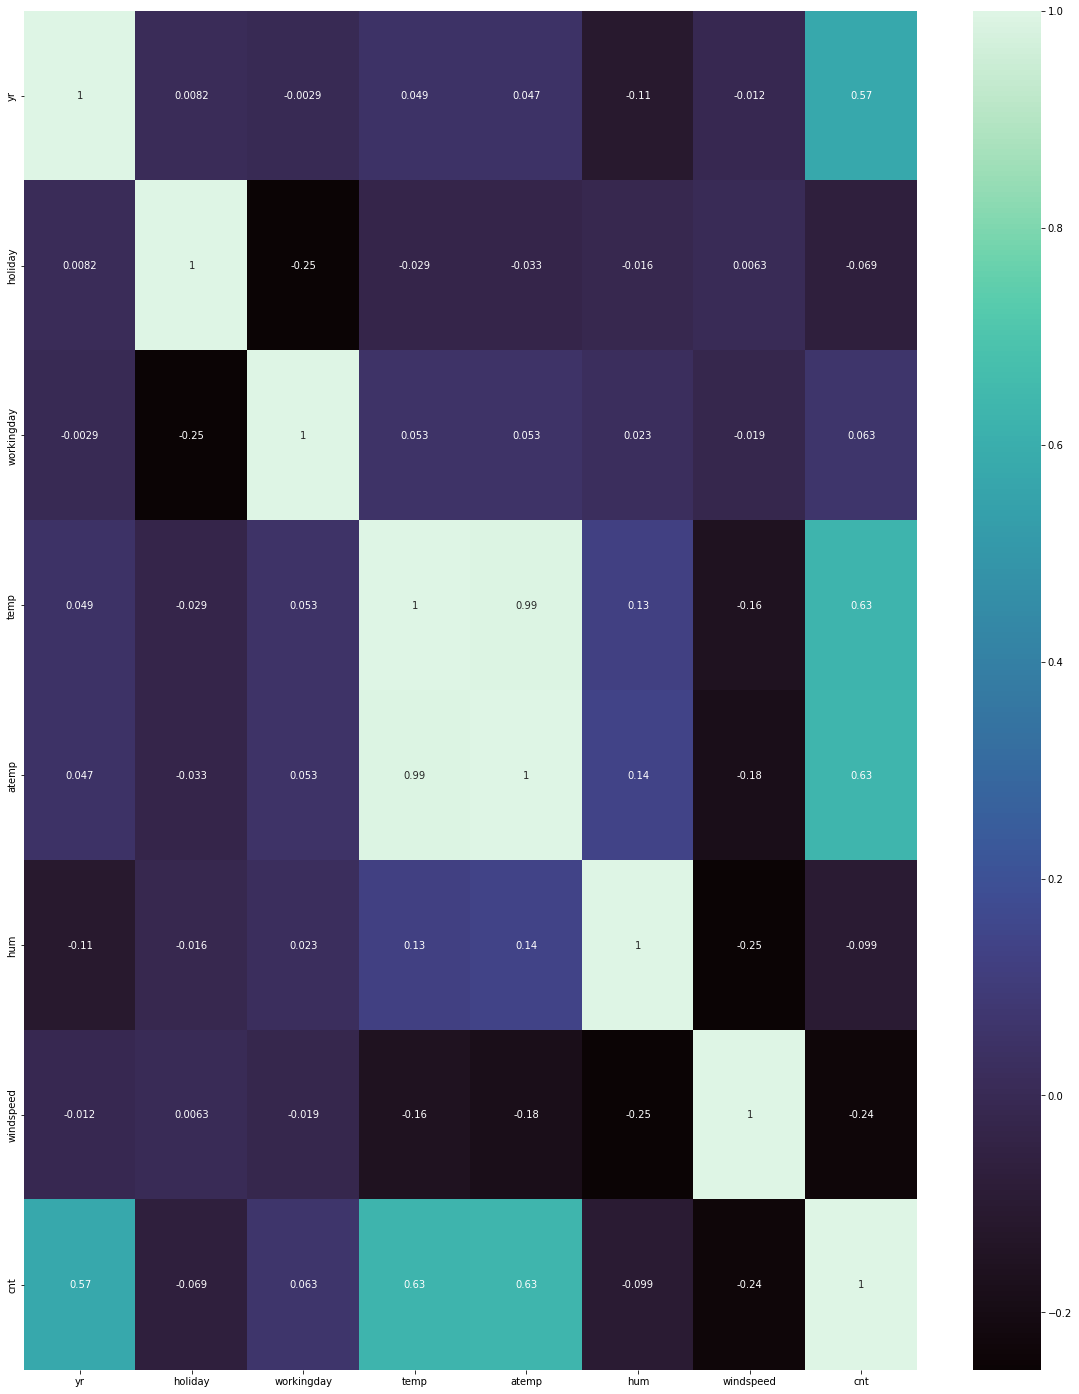

In [26]:
plt.figure(figsize=(20,25))
sns.heatmap(bike_data.corr(), cmap = "mako", annot = True)
plt.show()

<font color="dodgerblue"> 

1.   Drop the Highly Corelated Variable - in this case atemp
2.   season has a high influance on the data
temp also shows some anount of relation
weather shows significant effect on sales
working/ week days has a significant effect on the data



# Dummy Variable 
Variables mnth, weekday, season, weathersit have various level
- weathersit - 4 levels
- mnth - 12 levels
- season - 4 levels
- weekday - 7 levels


In [27]:
dummy = bike_data[['season','mnth','weekday','weathersit']]

In [28]:
dummy = pd.get_dummies(dummy, drop_first = True )

In [29]:
bike_data = pd.concat([dummy, bike_data], axis = 1)

### Check the data frame and the info details

In [30]:
bike_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain and Snow,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,Spring,0,Jan,0,Sat,0,Cloudy,14.1108,18.1812,80.5833,10.7499,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,Spring,0,Jan,0,Sun,0,Cloudy,14.9026,17.6869,69.6087,16.6521,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Spring,0,Jan,0,Mon,1,Clear,8.0509,9.4703,43.7273,16.6367,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Spring,0,Jan,0,Tue,1,Clear,8.2000,10.6061,59.0435,10.7398,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Spring,0,Jan,0,Wed,1,Clear,9.3052,11.4635,43.6957,12.5223,1600


In [31]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   season_Spring                   730 non-null    uint8  
 1   season_Summer                   730 non-null    uint8  
 2   season_Winter                   730 non-null    uint8  
 3   mnth_Aug                        730 non-null    uint8  
 4   mnth_Dec                        730 non-null    uint8  
 5   mnth_Feb                        730 non-null    uint8  
 6   mnth_Jan                        730 non-null    uint8  
 7   mnth_Jul                        730 non-null    uint8  
 8   mnth_Jun                        730 non-null    uint8  
 9   mnth_Mar                        730 non-null    uint8  
 10  mnth_May                        730 non-null    uint8  
 11  mnth_Nov                        730 non-null    uint8  
 12  mnth_Oct                        730 

### Drop the original variables

In [32]:
bike_data.drop(['season'], axis = 1, inplace = True)

In [33]:
bike_data.drop(['weathersit'], axis=1, inplace = True)

In [34]:
bike_data.drop(['weekday'], axis = 1, inplace = True)

In [35]:
bike_data.drop(['mnth'], axis = 1, inplace = True)

In [36]:
bike_data.shape

(730, 30)

## Split the data into Training and Testing data
- Check the shape of data
- Check the initial view records


In [37]:
np.random.seed(0)
training, testing = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
training.shape

(510, 30)

In [39]:
testing.shape

(219, 30)

## Rescaling the data 
- Set Scaler
- MinMax Scaling
- Standardization 

In [40]:
scaler = MinMaxScaler()

In [41]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

In [42]:
training[num_vars] = scaler.fit_transform(training[num_vars])

In [43]:
training.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain and Snow,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0.5099,0.5011,0.5754,0.3008,0.8642
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.8152,0.7664,0.7256,0.2647,0.8277
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0.4424,0.4390,0.6402,0.2553,0.4653
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.2451,0.2003,0.4981,0.6631,0.2041
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0.3957,0.3917,0.5045,0.1885,0.4830


In [44]:
training.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain and Snow,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000
mean,0.2431,0.2451,0.2490,0.0961,0.0843,0.0667,0.0882,0.0765,0.0745,0.0980,0.0843,0.0863,0.0863,0.0804,0.1510,0.1549,0.1431,0.1333,0.1314,0.1588,0.3431,0.0294,0.5078,0.0255,0.6765,0.5373,0.5130,0.6504,0.3208,0.5136
std,0.4294,0.4306,0.4329,0.2950,0.2781,0.2497,0.2839,0.2660,0.2629,0.2977,0.2781,0.2810,0.2810,0.2722,0.3584,0.3622,0.3506,0.3403,0.3381,0.3659,0.4752,0.1691,0.5004,0.1578,0.4683,0.2258,0.2124,0.1459,0.1698,0.2246
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3399,0.3321,0.5386,0.1992,0.3564
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.5405,0.5268,0.6537,0.2968,0.5186
75%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.7352,0.6885,0.7548,0.4144,0.6847
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


## Heatmap to check the highly corelated values

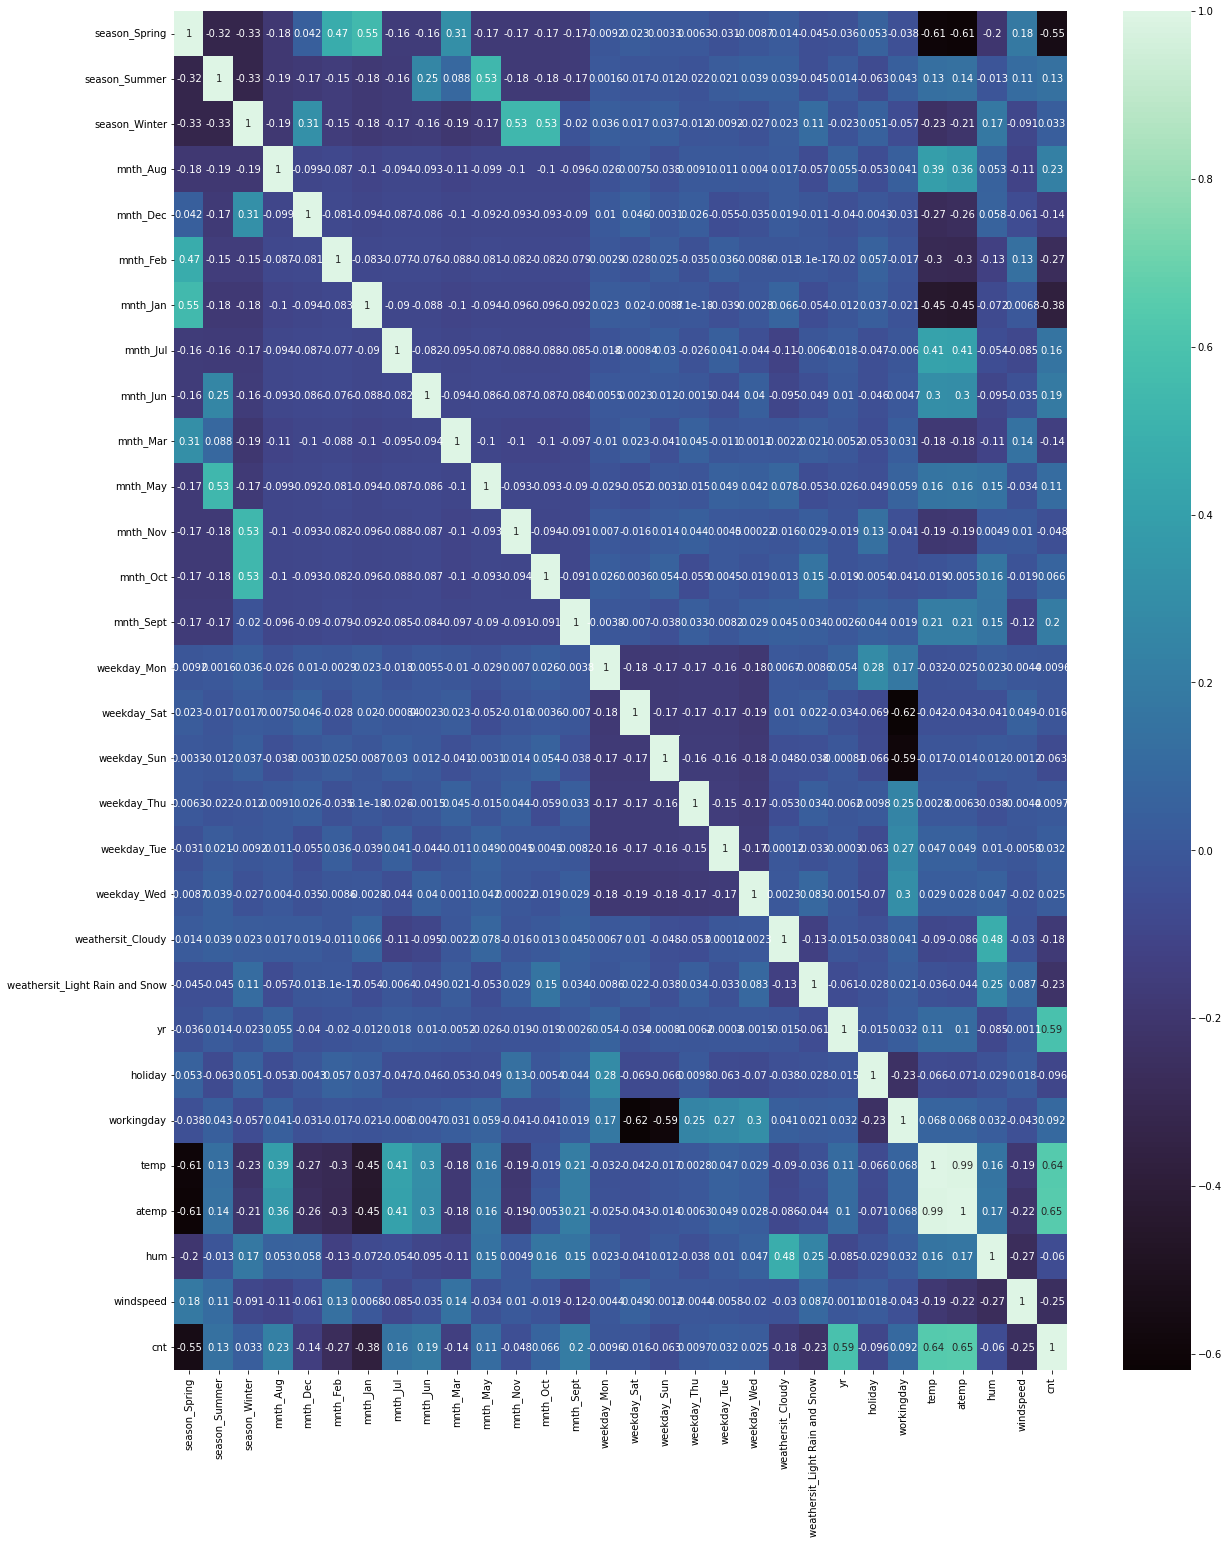

In [45]:
plt.figure(figsize = (20, 25))
sns.heatmap(training.corr(), annot = True, cmap = "mako")
plt.show()

<font color='dodgerblue'> since only temp and cnt seem to be corelated and cnt is the dependent variable we will (iterativly) build the model using all the columns

## Divide into X and Y sets for the Model Building

In [46]:
y_train = training.pop('cnt')
X_train = training

In [47]:
X_train.shape

(510, 29)

In [48]:
y_train.shape

(510,)

## Linear Model
- A mixed approach will be taken to build the model.
- RFE approach will be used for feature selection
- Use statsmodel for building the actual model


Using 15 variables as base line

In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [50]:
rfe = RFE(estimator=lm, n_features_to_select = 15)

In [51]:
rfe = rfe.fit(X = X_train, y = y_train)

In [52]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', False, 5),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 15),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 10),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 11),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light Rain and Snow', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [53]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Cloudy',
       'weathersit_Light Rain and Snow', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]

Index(['season_Summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'atemp'],
      dtype='object')

## Statsmodel
1. Build Model
2. Add a Constant Variable 
- 2a. Verify Data
3. Run Linear Model
- 3a. Get Parameters
- 3b. View Summary

In [55]:
X_train_rfe = X_train[col]

In [56]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [57]:
X_train_rfe.head()

,const,season_Spring,season_Winter,mnth_Jan,mnth_Jul,mnth_Sept,weekday_Sat,weekday_Sun,weathersit_Cloudy,weathersit_Light Rain and Snow,yr,holiday,workingday,temp,hum,windspeed
653,1.0000,0,1,0,0,0,0,0,0,0,1,0,1,0.5099,0.5754,0.3008
576,1.0000,0,0,0,1,0,0,0,0,0,1,0,1,0.8152,0.7256,0.2647
426,1.0000,1,0,0,0,0,1,0,1,0,1,0,0,0.4424,0.6402,0.2553
728,1.0000,1,0,0,0,0,0,1,0,0,1,0,0,0.2451,0.4981,0.6631
482,1.0000,0,0,0,0,0,1,0,1,0,1,0,0,0.3957,0.5045,0.1885


In [58]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit()

In [59]:
lm_1.params

const                             0.2503
season_Spring                    -0.0979
season_Winter                     0.0538
mnth_Jan                         -0.0402
mnth_Jul                         -0.0744
mnth_Sept                         0.0602
weekday_Sat                       0.1066
weekday_Sun                       0.0533
weathersit_Cloudy                -0.0593
weathersit_Light Rain and Snow   -0.2538
yr                                0.2316
holiday                          -0.0060
workingday                        0.0965
temp                              0.4610
hum                              -0.1419
windspeed                        -0.1757
dtype: float64

In [60]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Mon, 20 Jun 2022   Prob (F-statistic):          4.03e-190
Time:                        18:16:48   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

<font color="red"> There seems to be strong multicollinearity problems. p-value is < 0.05 hence we will check VIF. For now we will continue with the same model

In [61]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weekday_Sat,inf
7,weekday_Sun,inf
11,holiday,inf
12,workingday,inf
13,temp,3.1900
1,season_Spring,2.7200
14,hum,1.9000
2,season_Winter,1.8100
8,weathersit_Cloudy,1.5700
3,mnth_Jan,1.5500


## Drop the abberent variables and calculate VIF again

In [62]:
X_train_rfe = X_train_rfe.drop(['weekday_Sat'], axis = 1)
X_train_rfe = X_train_rfe.drop(['weekday_Sun'], axis = 1)
X_train_rfe = X_train_rfe.drop(['holiday'], axis = 1)
X_train_rfe = X_train_rfe.drop(['workingday'], axis = 1)

In [63]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.9600
9,temp,3.1800
1,season_Spring,2.7100
10,hum,1.8900
2,season_Winter,1.8000
3,mnth_Jan,1.5500
6,weathersit_Cloudy,1.5500
4,mnth_Jul,1.3000
7,weathersit_Light Rain and Snow,1.2400
11,windspeed,1.1900


<font color="red"> VIF for hum and temp is significantly higher than a thumbrule value of 5. we will first drop hum (humidity) and recalculate VIF

In [64]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [65]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,35.9400
9,temp,3.0000
1,season_Spring,2.7100
2,season_Winter,1.7400
3,mnth_Jan,1.5500
4,mnth_Jul,1.2900
5,mnth_Sept,1.1000
10,windspeed,1.1000
7,weathersit_Light Rain and Snow,1.0500
6,weathersit_Cloudy,1.0400


- <font color="dodgerblue"> After dropping humiditty (hum) we can see that the VIF has come down from the thumb rule value of 5 </font>
- <font color="red"> Const needs to be dropped as the value of VIF is significantly higher than VIF of 5

In [66]:
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [67]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,4.6300
9,windspeed,4.0000
0,season_Spring,2.2400
7,yr,2.0600
2,mnth_Jan,1.6000
5,weathersit_Cloudy,1.5200
1,season_Winter,1.3800
3,mnth_Jul,1.3600
4,mnth_Sept,1.2000
6,weathersit_Light Rain and Snow,1.0800


- <font color="dodgerblue"> After dropping const, we can see that the VIF has come down from the thumb rule value of 5 for all the features </font>

## Create the Final Model & Reconfirm the VIF

In [68]:
X_train_lm = sm.add_constant(X_train_rfe)

In [69]:
lm_final = sm.OLS(y_train,X_train_lm).fit()

In [70]:
lm_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     243.8
Date:                Mon, 20 Jun 2022   Prob (F-statistic):          6.73e-185
Time:                        18:16:48   Log-Likelihood:                 490.53
No. Observations:                 510   AIC:                            -959.1
Df Residuals:                     499   BIC:                            -912.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2644      0.025     10.653      0.000       0.216       0.313
season_Spring                     -0.1039      0.016     -6.544      0.000      -0.135      -0.073
season_Winter                      0.0403      0.013      3.192      0.002       0.015       0.065
mnth_Jan                          -0.0436      0.018     -2.401      0.017      -0.079      -0.008
mnth_Jul                          -0.0683      0.018     -3.861      0.000      -0.103      -0.034
mnth_Sept                          0.0550      0.016      3.441      0.001       0.024       0.086
weathersit_Cloudy                 -0.0785      0.009     -8.810      0.000      -0.096      -0.061
weathersit_Light Rain and Snow    -0.2836      0.025    -11.301      0.000      -0.333      -0.234
yr                                 0.2353      0.008     28.115      0.000       0.219       0.252
temp                               0.4337      0.032     13.649      0.000       0.371       0.496
windspeed                         -0.1501      0.026     -5.860      0.000      -0.200      -0.100
==============================================================================
Omnibus:                       70.723   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.557
Skew:                          -0.703   Prob(JB):                     6.20e-40
Kurtosis:                       5.554   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,4.6300
9,windspeed,4.0000
0,season_Spring,2.2400
7,yr,2.0600
2,mnth_Jan,1.6000
5,weathersit_Cloudy,1.5200
1,season_Winter,1.3800
3,mnth_Jul,1.3600
4,mnth_Sept,1.2000
6,weathersit_Light Rain and Snow,1.0800


<font color="dodgerblue"> lm_final will be considered the final model and now we can proceed towards predictions

## Conclusion and Final Check of the Training Data

In [72]:
y_train_cnt = lm_final.predict(X_train_lm)

Text(0.5, 0, 'Errors')

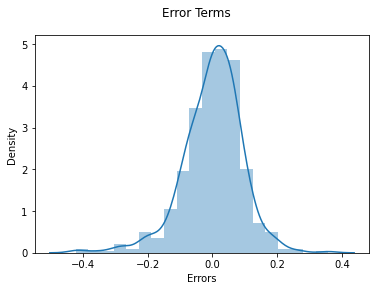

In [73]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms')
plt.xlabel('Errors')

<font color="dodgerblue"> 
1. All the error are around and are normally distributed.
2. Working (fitted) model

## Prediction
1. Add scaling
2. Describe the data
3. Divide the data
- 3a. Add the constant
4. Predict using lm_final (Final Model)

In [74]:
vars =  ['cnt','hum','windspeed','temp','atemp']

In [75]:
testing[num_vars] = scaler.transform(testing[num_vars])

In [76]:
testing.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain and Snow,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000
mean,0.2557,0.2648,0.2329,0.0594,0.0868,0.1005,0.0776,0.1050,0.0959,0.0548,0.0868,0.0731,0.0822,0.0868,0.1279,0.1187,0.1461,0.1644,0.1644,0.1005,0.3196,0.0274,0.4795,0.0365,0.6986,0.5589,0.5330,0.6385,0.3133,0.5206
std,0.4373,0.4423,0.4236,0.2368,0.2821,0.3013,0.2682,0.3073,0.2951,0.2281,0.2821,0.2608,0.2753,0.2821,0.3347,0.3242,0.3540,0.3715,0.3715,0.3013,0.4674,0.1636,0.5007,0.1880,0.4599,0.2337,0.2179,0.1490,0.1599,0.2184
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0466,0.0260,0.2619,-0.0428,0.0482
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3546,0.3448,0.5273,0.1985,0.3775
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.5587,0.5492,0.6277,0.2995,0.5243
75%,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.7591,0.7141,0.7439,0.4030,0.6727
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9844,0.9809,1.0021,0.8075,0.9633


In [77]:
y_test = testing.pop('cnt')
X_test = testing

In [78]:
X_test = sm.add_constant(X_test)

In [79]:
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]

X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           219 non-null    float64
 1   season_Spring                   219 non-null    uint8  
 2   season_Winter                   219 non-null    uint8  
 3   mnth_Jan                        219 non-null    uint8  
 4   mnth_Jul                        219 non-null    uint8  
 5   mnth_Sept                       219 non-null    uint8  
 6   weathersit_Cloudy               219 non-null    uint8  
 7   weathersit_Light Rain and Snow  219 non-null    uint8  
 8   yr                              219 non-null    int64  
 9   temp                            219 non-null    float64
 10  windspeed                       219 non-null    float64
dtypes: float64(3), int64(1), uint8(7)
memory usage: 10.1 KB


In [80]:
# Make the Predictions
y_pred = lm_final.predict(X_test)

In [81]:
r2_score(y_test, y_pred)

0.803140492912559

## Final Conclusion
<font color='dodgerblue'> 
1. r_squared on the test set is 0.80 
2. r-squared on the trained set 0.83 
**This has reasonable similarity** and R-squared is a **good** measure for linear regression models.

## Final Notes. 
1. Plot the graph for actual vs predicted values
2. Get the Variable names and coefficient  values for "best fitted line"

Text(0, 0.5, 'y_pred')

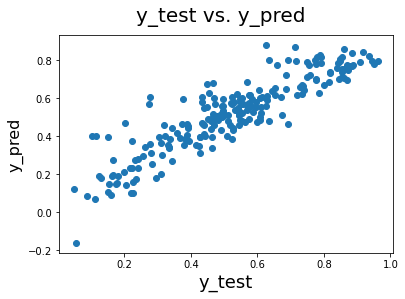

In [82]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs. y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [83]:
param = pd.DataFrame(lm_final.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'}, inplace = True)
param['index'] = list(range(0,11))
param.set_index('index', inplace = True)
param.sort_values(by = 'Coefficient value', ascending = False, inplace = True)
param


,Variables,Coefficient value
index,,
9,temp,0.4337
0,const,0.2644
8,yr,0.2353
5,mnth_Sept,0.0550
2,season_Winter,0.0403
3,mnth_Jan,-0.0436
4,mnth_Jul,-0.0683
6,weathersit_Cloudy,-0.0785
1,season_Spring,-0.1039


## Closing Summery
Positive coefficients e.g temp,season_Summer show positive corelation to cnt (Count) Negative coefficients show a negative corelation
Top 3 features that contribute to demand are:

- Temperature
- Weather situation
- Season

## Additional Notes
- Higher demand can be expected in Jan, Jul, Nov, Dec
- Temprature increate equats to increased demands
 
-(END)
